In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# 2-D Cahn-Hilliard Equation

# Parameters
W = 1
M = 1
epsilon = 0.1

t_0 = 0
t_f = 5

h = 0.1
dt = 0.0003

# Approximate laplacians by taking central difference

def Central_Diff(x,h):
    
    laplacian = (np.roll(x,1,axis=0) + np.roll(x,-1,axis=0) + np.roll(x,1,axis=1) + np.roll(x,-1,axis=1) - 4*x)/h**2
    
    return(laplacian)

# Build Cahn-Hilliard Equation

df_dc = lambda c: 0.5*W*c*(1-c)*(1-2*c)
dF_dc = lambda c,h: df_dc(c) - epsilon**2 * Central_Diff(c,h)

# Grid Size
Nx = 100
Ny = 100

# Preallocate array to store concentration profile over time
time = np.arange(t_0,t_f,dt)
concentration = np.zeros([len(time),Ny,Nx])

# Initial Conditions
c_avg = 0.5 # Average composition of system
fluct = 0.1 # Thermal fluctuations

c = c_avg*np.ones([Ny,Nx]) + (2*np.random.rand(Ny,Nx) - 1)*fluct

for n in range(0,len(time)):
    c = c + dt*M*Central_Diff(dF_dc(c,h),h)
    concentration[n]= c

In [26]:
# Show Animation

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1,wspace=None, hspace=None)
#ax.axis('off')

nth = 100
numframe = len(time)//nth
delay_in_ms = 50

cmap = plt.get_cmap('jet')

def animate(frame):
    ax.clear()
    ax.pcolormesh(concentration[frame*nth],cmap = cmap, vmin = 0,vmax = 1)
    ax.axis('off')

anim = FuncAnimation(fig, animate, frames = numframe, interval = delay_in_ms)
HTML(anim.to_html5_video())

In [4]:
# Save as gif
#anim.save('/Users/kieranfitzmaurice/Desktop/Cahn_Hilliard_python.gif', writer='imagemagick', fps=40)

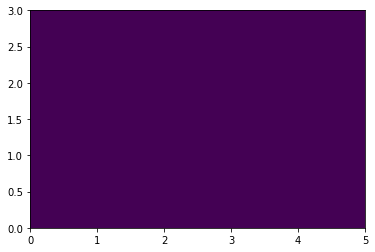

In [24]:
plt.close('all')
A = np.ones((3,5))
plt.pcolormesh(A)
#plt.imshow(A)
plt.show()